## isee_machin_Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
isee_machine_operation = pd.read_csv('./data/isee_machine_operation.csv')

In [3]:
isee_machine_operation.columns

Index(['ModuleCount', 'creationTime', 'CycleTime', 'VpPosition', 'VpTime',
       'VpPressure', 'MaxInjectionPressure', 'InjectionEndPosition',
       'PlasticizingTime', 'PlasticsEndPosotion', 'ClampingTime',
       'MouldOpeningTime', 'HotOilContoller', 'TankTemp', 'NozzleTemp',
       'Zone1', 'Zone2', 'Zone3', 'Zone4', 'creationDate', 'creationTime_diff',
       'CycleNum', 'Operation_label', 'True_label', 'Cluster_label',
       'AD_label'],
      dtype='object')

In [4]:
isee_machine_operation = isee_machine_operation[isee_machine_operation['Operation_label']==1]

In [5]:
# Though the following import is not directly being used, it is required
# for 3D projection to work
from sklearn.cluster import SpectralClustering,KMeans
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [6]:
X_all = isee_machine_operation[[ 'CycleTime', 'VpPosition', 'VpTime',
       'VpPressure', 'MaxInjectionPressure', 'InjectionEndPosition',
       'PlasticizingTime', 'PlasticsEndPosotion', 'ClampingTime',
       'MouldOpeningTime', 'HotOilContoller', 'TankTemp', 'NozzleTemp',
       'Zone1', 'Zone2', 'Zone3', 'Zone4']]
y = isee_machine_operation['True_label']
true_y = y.replace({'Y':-1,'N':1})
cols = X_all.columns.tolist()

X_scaler = StandardScaler().fit_transform(X_all)
# X_train, X_test, y_train, y_test = train_test_split(X_scaler,true_y,test_size= 0.3, stratify  = y,random_state = 42)

C:\Users\ARA\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ARA\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


### Anomaly Detection
- 일단 그냥 해보는거

In [6]:
model = IsolationForest(behaviour='new', max_samples=100,
                      random_state=42, contamination=0.07)

In [7]:
model.fit(X_scaler)
ad_pred_y = model.predict(X_scaler)

### Clustering
- Kmeans

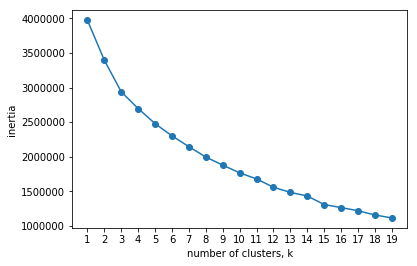

In [7]:
# 군집갯수 정하기
"""
Inertia value는 군집화가된 후에, 각 중심점에서 군집의 데이타간의 거리를 합산한것이으로 군집의 응집도를 나타내는 값이다, 
이 값이 작을 수록 응집도가 높게 군집화가 잘되었다고 평가할 수 있다.
"""
ks = range(1,20)

inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(X_scaler)
    inertias.append(model.inertia_)

    

# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [29]:
clustering = KMeans(n_clusters=7, random_state=42).fit(X_scaler)

In [30]:
cluster_label = clustering.labels_

In [32]:
# label 모음집
isee_machine_operation['Cluster_label'] = cluster_label
#isee_machine_operation['AD_label'] = ad_pred_y

C:\Users\ARA\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [33]:
# 군집간 비교 엑셀 저장
isee_machine_operation[['creationTime','Operation_label','Operation_label', 'True_label','Cluster_label','AD_label']].to_excel('./output/7cluster_label_oper1.xlsx')

In [34]:
# 군집간 라벨 추가 데이터 저장
isee_machine_operation.to_csv('./data/isee_machine_operation.csv',index = False)